In [31]:
import pandas as pd
import numpy as np
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score 
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [32]:
df= pd.read_excel(r'C:\Users\ezgio\Documents\proje_data.xlsx')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
missing_percent =df.isnull().mean()

In [35]:
missing_percent

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
income            0.0
dtype: float64

In [36]:
#missing_percent =df.isnull().mean()

In [37]:
#missing_percent

In [38]:
mask = df['occupation'] == '?' 

In [39]:
mask.value_counts()

False    30718
True      1843
Name: occupation, dtype: int64

In [40]:
mask.sum() # number of ? in occupation column

1843

In [41]:
 df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [42]:
df['occupation'].value_counts().idxmax() #the most frequent 

'Prof-specialty'

In [43]:
occup=  df['occupation'].replace("?", "Prof-specialty") #replace ? with Prof-Specialty

In [44]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [45]:
col= df.columns 

In [46]:
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [47]:
#Inputation
# There are missing data in some columns and they are represented by "?" Those values are replaced by the most frequent value
for i in col:
      print(i)
      a = df[i].replace("?", df[i].value_counts().idxmax(),inplace=True)
      print(a)




age
None
workclass
None
fnlwgt
None
education
None
education-num
None
marital-status
None
occupation
None
relationship
None
race
None
sex
None
capital-gain
None
capital-loss
None
hours-per-week
None
native-country
None
income
None


In [48]:
 df['occupation'].value_counts()

Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [49]:
df.drop('fnlwgt', inplace=True, axis=1) #drop this column 

In [50]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [51]:
# Split the data into features and target label
y = df['income']
X = df.drop('income', axis = 1)

In [52]:
# TODO: Encode the 'y' data to numerical values
y = y.map({'<=50K':0,'>50K':1}) 

In [53]:
y.value_counts(normalize=True)#0's are more than 1's, new data may tend to be 0.

0    0.75919
1    0.24081
Name: income, dtype: float64

In [54]:
y.size

32561

In [55]:
24720/y.size

0.7591904425539756

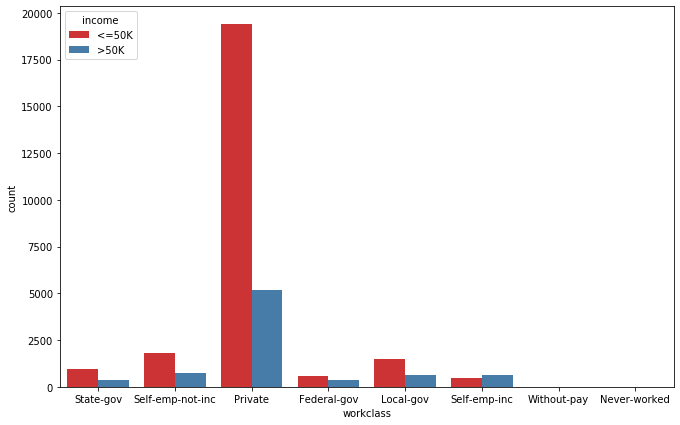

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(11,7))
sns.countplot(x='workclass',hue='income',data=df,palette='Set1')

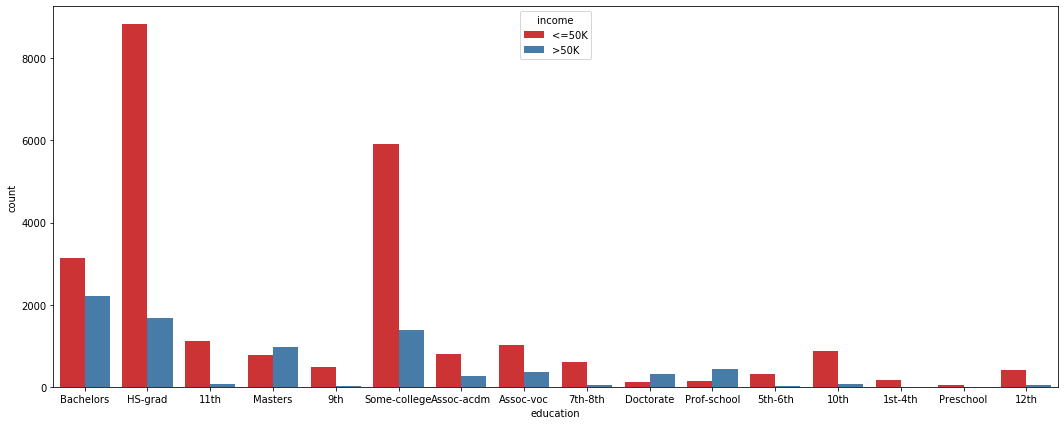

In [68]:
plt.figure(figsize=(18,7))
sns.countplot(x='education',hue='income',data=df,palette='Set1')

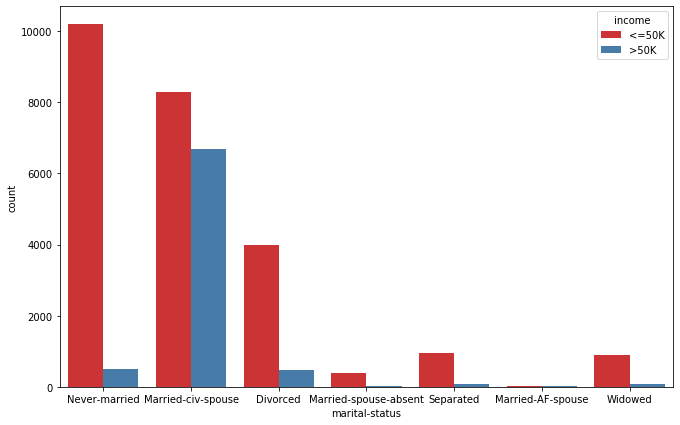

In [69]:
plt.figure(figsize=(11,7))
sns.countplot(x='marital-status',hue='income',data=df,palette='Set1')

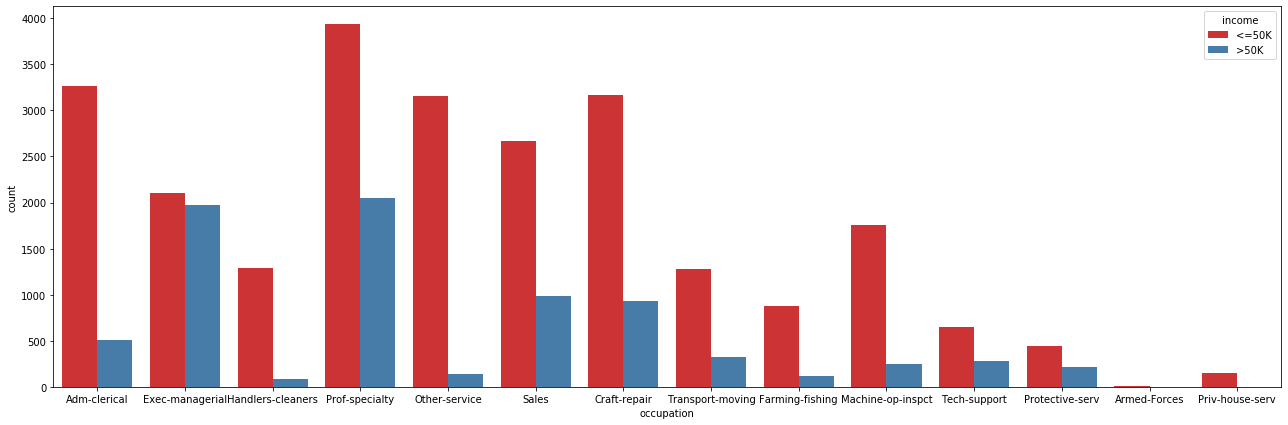

In [70]:
plt.figure(figsize=(22,7))
sns.countplot(x='occupation',hue='income',data=df,palette='Set1')

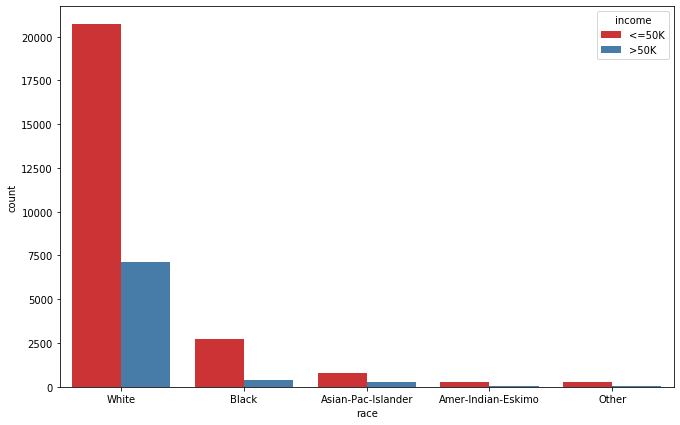

In [71]:
plt.figure(figsize=(11,7))
sns.countplot(x='race',hue='income',data=df,palette='Set1')

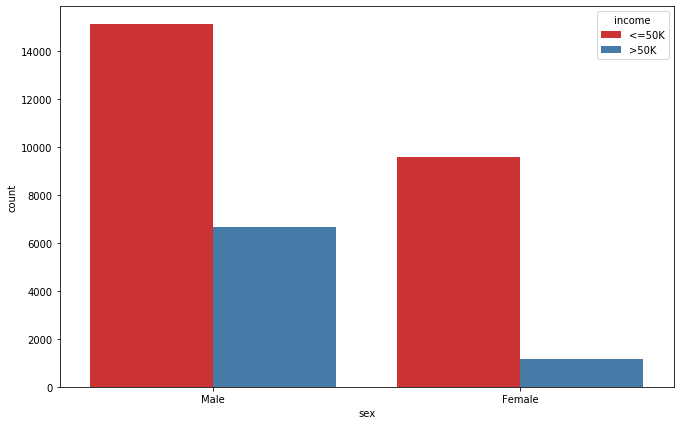

In [72]:
plt.figure(figsize=(11,7))
sns.countplot(x='sex',hue='income',data=df,palette='Set1')

we need to bring all features to the same scale

In [73]:
# Import sklearn.preprocessing.StandardScaler


from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


X[numerical]=scaler.fit_transform(X[numerical])

# Show an example of a record with scaling applied
#display(features_log_minmax_transform.head(n = 5))

In [74]:
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


In [75]:
# TODO: One-hot encode data using pandas.get_dummies()
X = pd.get_dummies(X)

In [76]:
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


This is a classification problem. Our output is income and we need to train our model based on the features and classify 
the people"s income as less than or more than 50k. 

Data set include features having categorical and numerical values in it. Categorical values converted to 0 and 1's by using get_dummies function. Columns increased to 108 after this operation.

Output(income) consists of 0 and 1 as well after mapping them

In [77]:
# Import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42, stratify=y)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 26048 samples.
Testing set has 6513 samples.



I have tried three methods below and printed the scores as well.

In [78]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
       
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [79]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\ezgio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ezgio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'Logistic Regression': 0.8552126516198373,
 'KNN': 0.8255796100107478,
 'Random Forest': 0.8447719944725933}

here, Gradientboosting Classifier is used and score is similar to results shown above.

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.001,max_depth=1, random_state=0).fit(X_train, y_train)

In [81]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_boost.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


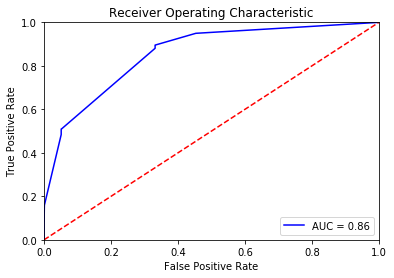

In [82]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [195]:
clf_boost.score(X_test, y_test)

0.7793643482266237

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
clf_boost = GradientBoostingClassifier(n_estimators=10000, learning_rate=0.001,max_depth=1, random_state=0).fit(X_train, y_train)

In [197]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf_boost.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

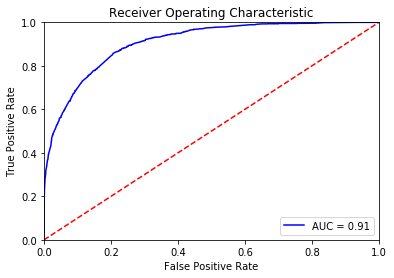

In [198]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [199]:
clf_boost.score(X_test, y_test)

0.8575157377552587

In [201]:
pred = clf_boost.predict(X_test)

In [239]:
print(classification_report(y_test , pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4945
           1       0.81      0.54      0.64      1568

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513

[[4742  203]
 [ 725  843]]


Logistic regression and Gradientboosting Classifier have similar results and they are better scores than other algorithms. Gradientboosting Classifier gets higher score, if number of estimators=10000


In [83]:
from sklearn.metrics import roc_auc_score

weights = {0 : '0.24081', 1 : '0.75919'}
logmodel_auto = LogisticRegression(class_weight = weights, solver = 'liblinear')
logmodel_auto.fit(X_train, y_train)
predictions_std_auto = logmodel_auto.predict(X_test)
print(classification_report(y_test, predictions_std_auto))
print(confusion_matrix(y_test, predictions_std_auto))
accuracy_score(y_test, predictions_std_auto)
# Under ROC curve
prob_y_4 = logmodel_auto.predict_proba(X_test)
prob_y_4 = [p[1] for p in prob_y_4]
print(roc_auc_score(y_test, prob_y_4))
accuracy_score(y_test, predictions_std_auto)

              precision    recall  f1-score   support

           0       0.94      0.78      0.86      4945
           1       0.56      0.86      0.67      1568

    accuracy                           0.80      6513
   macro avg       0.75      0.82      0.76      6513
weighted avg       0.85      0.80      0.81      6513

[[3869 1076]
 [ 226 1342]]
0.9020546160830358


0.8000921234454169

In [84]:
from sklearn.model_selection import GridSearchCV
weights = np.linspace(0.03, 0.97, 55)

gsc = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear'),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='roc_auc',
    cv=3
)
grid_result = gsc.fit(X, y)

In [85]:
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.4825925925925926, 1: 0.5174074074074074}}


In [86]:
rf_w = RandomForestClassifier(class_weight = {0:0.4825925925925926, 1:0.5174074074074074})
rf_w.fit(X_train, y_train)
predictions = rf_w.predict(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test, predictions)
print(roc_auc_score(y_test, predictions))

C:\Users\ezgio\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.70      0.61      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513

[[4532  413]
 [ 612  956]]
0.7630875858938114


Since the data in income are unbalanced, we need to use different weights in classification algoritms. The model is better in finding 0's than finding 1's.
When weights = {0 : '0.24081', 1 : '0.75919'} is used in Logistic regression above, confusion matrix shows that it has better in finding 1's but 
When class_weight': {0: 0.4825925925925926, 1: 0.5174074074074074}is used, confusion matrix shows that model is not very successful in finding 1's. 

In [87]:
from sklearn.utils import resample
df_minority = df[y==1]
df_majority = df[y==0]
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Since there is an unbalance in data, I will try to make them equal by resampling.

In [88]:

# Upsample minority class
# sample with replacement to match majority class and get reproducible results
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=24720,    
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])


In [89]:
df_upsampled

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,50,United-States,>50K
28087,41,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,15024,0,40,United-States,>50K
6035,78,Self-emp-not-inc,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,99999,0,20,United-States,>50K
27437,43,Private,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,>50K


In [90]:
# Train/test, normalize the new data set
features_upsampled = df_upsampled.iloc[:,:-1]
result_upsampled = df_upsampled.iloc[:,-1]

result_upsampled = result_upsampled.map({'<=50K':0,'>50K':1}) 


from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


features_upsampled[numerical]=scaler.fit_transform(features_upsampled[numerical])
features_upsampled = pd.get_dummies(features_upsampled)



In [91]:
features_upsampled

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.800000,0.021740,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,0.191781,0.800000,0.000000,0.0,0.500000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
28087,0.328767,0.933333,0.150242,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6035,0.835616,0.800000,1.000000,0.0,0.193878,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27437,0.356164,0.866667,0.000000,0.0,0.500000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(features_upsampled, result_upsampled, test_size = 0.2, random_state = 14)




In [93]:

# new log model for upsampled data
logmodel_upsampled = LogisticRegression(solver='liblinear')
logmodel_upsampled.fit(X_train_upsampled, y_train_upsampled)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
predictions_y_2_upsampled = logmodel_upsampled.predict(X_test_upsampled)

In [95]:
# very poor results
print(classification_report(y_test_upsampled, predictions_y_2_upsampled))
print(confusion_matrix(y_test_upsampled, predictions_y_2_upsampled))
accuracy_score(y_test_upsampled, predictions_y_2_upsampled)
# Under ROC curve
prob_y_2_upsampled = logmodel_upsampled.predict_proba(X_test_upsampled)
prob_y_2_upsampled = [p[1] for p in prob_y_2_upsampled]
print(roc_auc_score(y_test_upsampled, prob_y_2_upsampled))


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      4972
           1       0.80      0.85      0.83      4916

    accuracy                           0.82      9888
   macro avg       0.82      0.82      0.82      9888
weighted avg       0.82      0.82      0.82      9888

[[3931 1041]
 [ 713 4203]]
0.9082845423386425


Roc_auc_score gives higher score now. 